In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
df1 = pd.read_csv('Output Datasets/PTEN_MCF10A_annotated_091919.csv', index_col=False)

In [3]:
df1.head()

,Unnamed: 0,variant,MCF10A score,std_dev,std_err,ClinVar,significance,agg condition,COSMIC,COSMIC cancer type,COSMIC tissue type,gnomAD,AA position,domain
0,0,K6E,0.3311,0.06073,0.03506,no,NaN,NaN,yes,"['Carcinoma', 'Glioma']","['Endometrium', 'Stomach', 'Central nervous sy...",no,6,PBD
1,1,K6I,0.4544,0.04539,0.02621,no,NaN,NaN,yes,['Glioma'],['Central nervous system'],no,6,PBD
2,2,R15S,0.3870,0.05989,0.03458,yes,Likely pathogenic,Hereditary cancer-predisposing syndrome,yes,"['Carcinoma', 'Glioma']","['Thyroid', 'Large intestine', 'Central nervou...",no,15,phosphatase
3,3,M35V,0.3606,0.08549,0.04936,yes,Likely pathogenic,"PTEN hamartoma tumor syndrome, not provided, I...",yes,"['Carcinoma', 'Glioma']","['Biliary tract', 'Large intestine', 'Central ...",no,35,phosphatase
4,4,P38H,0.3521,0.10320,0.05958,no,NaN,NaN,yes,['Malignant melanoma'],['NS'],no,38,phosphatase


# now start plotting colormaps

In [63]:
# converting column dtype from obj to cat
df1_cat = df1.loc[:, ['domain', 'significance']]

for col in df1_cat.columns:
    df1_cat[col] = df1_cat[col].astype('category')

print(df1_cat.dtypes)

domain          category
significance    category
dtype: object


In [64]:
for col in df1_cat.columns:
    df1_cat[col] = df1_cat[col].cat.codes

In [66]:
df1_cat['variant'] = df1['variant']

In [67]:
df1_cat

,domain,significance,variant
0,2,-1,K6E
1,2,-1,K6I
2,3,2,R15S
3,3,2,M35V
4,3,-1,P38H
5,3,3,G44D
6,3,1,A79T
7,3,-1,D92N
8,3,-1,H93Q
9,3,5,H93R


In [68]:
df1_cat.drop([3], axis=0, inplace=True)

In [69]:
df1_cat.reset_index(drop=True)

,domain,significance,variant
0,2,-1,K6E
1,2,-1,K6I
2,3,2,R15S
3,3,-1,P38H
4,3,3,G44D
5,3,1,A79T
6,3,-1,D92N
7,3,-1,H93Q
8,3,5,H93R
9,3,-1,I101F


In [9]:
def heatmap(df, col_1, col_2, title, cmap):
    # col_1 is the list of variants, col_2 is the data to plot
    # first process the data to horizontal
    df_toplot = df[[col_1, col_2]].transpose()
    df_toplot.columns = df_toplot.iloc[0]
    df_toplot = df_toplot.drop(df_toplot.index[0])
    df_toplot = df_toplot[df_toplot.columns].astype(float)
    print(df_toplot)
    
    # now plot the data
    fig = plt.figure(figsize=(7,5), dpi=200)
    ax = fig.add_subplot(111)
    ax.imshow(df_toplot, cmap=cmap)
    
    # set the ticks...
    ax.set_xticks(np.arange(len(df_toplot.columns)))
    ax.set_yticks(np.arange(0))
    
    # label the ticks
    ax.set_xticklabels(df_toplot.columns, fontsize=6, rotation=90)
 
    # set white grids
    ax.set_xticks(np.arange(len(df_toplot.columns)+1)-0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=0.4)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    #set the title
    ax.set_title(title)

variant  K6E  K6I  R15S  P38H  G44D  A79T  D92N  H93Q  H93R  I101F  ...  \
domain   2.0  2.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0    3.0  ...   

variant  M198I  N228S  T232A  P246L  N262S  D268E  D326N  K342N  P354Q  T382S  
domain     1.0    1.0    1.0    1.0    1.0    1.0    1.0    1.0    0.0    0.0  

[1 rows x 46 columns]


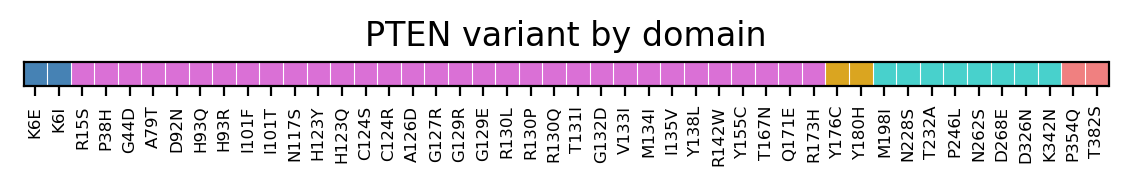

In [70]:
# specify custom colormaps
from matplotlib import colors
cmap = colors.ListedColormap(
    ['goldenrod','lightcoral','mediumturquoise','steelblue','orchid'])
#bounds= np.arange(5)
#norm = colors.BoundaryNorm(bounds, cmap.N)

heatmap(df1_cat, 'variant', 'domain', 'PTEN variant by domain', cmap)
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/PTEN_variant_domain.pdf', transparent=True)
plt.show()

In [ ]:
['royalblue', 'gold','mediumaquamarine','orange','mediumvioletred'])

In [43]:
np.arange(5)

array([0, 1, 2, 3, 4])

In [34]:
# need to make adjustments to cat encoding of ClinVar sig

new_ClinVar_sig = []
sig = df1['significance']

for i in range(len(sig)):
    if str(sig[i]) == 'nan':
        new_ClinVar_sig.append(5)
    elif 'Conflicting' in str(sig[i]):
        new_ClinVar_sig.append(0)
    elif 'Uncertain' in (sig[i]):
        new_ClinVar_sig.append(2)
    elif 'Likely pathogenic' in (sig[i]):
        new_ClinVar_sig.append(9)
    elif 'Pathogenic' in (sig[i]):
        new_ClinVar_sig.append(10)
    else:
        new_ClinVar_sig.append(2)

#if df1['ClinVar significance'][0] == 'N/A':
#    df1_cat.loc[0, 'ClinVar significance'] = 0

print(new_ClinVar_sig)

[5, 5, 9, 9, 5, 10, 2, 5, 5, 2, 5, 5, 2, 9, 10, 5, 10, 5, 9, 10, 10, 9, 0, 10, 10, 9, 5, 9, 9, 5, 2, 0, 10, 5, 9, 2, 2, 5, 2, 5, 10, 5, 5, 5, 2, 2, 5]


In [35]:
df1_cat['ClinVar significance'] = new_ClinVar_sig

variant               K6E  K6I  R15S  M35V  P38H  G44D  A79T  D92N  H93Q  \
ClinVar significance  5.0  5.0   9.0   9.0   5.0  10.0   2.0   5.0   5.0   

variant               H93R  ...  M198I  N228S  T232A  P246L  N262S  D268E  \
ClinVar significance   2.0  ...    5.0    2.0    5.0   10.0    5.0    5.0   

variant               D326N  K342N  P354Q  T382S  
ClinVar significance    5.0    2.0    2.0    5.0  

[1 rows x 47 columns]


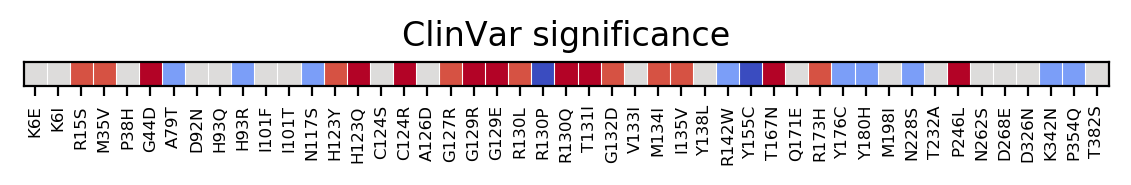

In [37]:
heatmap(df1_cat, 'variant', 'ClinVar significance', 'ClinVar significance', 'coolwarm')
mpl.rcParams['pdf.fonttype'] = 42
plt.savefig('Output PDFs/PTEN_ClinVar_significance.pdf', transparent=True)
plt.show()

In [326]:
# this will modify the range of the colormap by truncation
# https://stackoverflow.com/questions/18926031/how-to-extract-a-subset-of-a-colormap-as-a-new-colormap-in-matplotlib
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

In [335]:
cmap = plt.get_cmap('Set3')
new_cmap = truncate_colormap(cmap, 0.0, 1.0)